In [6]:
import matplotlib
import matplotlib.pyplot as plt
from hmftpy.plaquettes.triangular import plaq3, plaq12
import numpy as np

# cm = matplotlib.cm.magma
norm = matplotlib.colors.Normalize(vmin=-0.5, vmax=0.5)

az = .5*np.sqrt(3) # vertical displacement for equilateral triangles

def draw_tri_lattice(r0, Lx, Ly, color='lightgray'):
    x0, y0 = r0
    x, y = x0, y0
    for i in range(Lx):
        for j in range(Ly):
            xa = x + 1
            ya = y
            xb = x + .5
            yb = y + az
            plt.plot((xb, x, xa, xb), (yb, y, ya, yb), color=color, zorder=0, linewidth=1)
            x = xa
        if i%2 == 1:
            x = x0
            y = y0 + (i+1)*az
        else:
            x = x0 - .5
            y = y0 + (i+1)*az
    
def draw_12_cluster(r0, color='purple', fill=True):
    x0, y0 = r0
    plt.plot((x0, x0-.5, x0, x0+.5, x0+1.5, x0+2, x0+2.5, x0+2, x0+1, x0), 
             (y0, y0+az, y0+2*az, y0+3*az, y0+3*az, y0+2*az, y0+az, y0, y0, y0), 
             color=color, zorder=1, linewidth=1)
    if fill:
        plt.plot((x0, x0+1.5), (y0, y0+3*az),
                 color=color, zorder=1, linewidth=1)
        plt.plot((x0+1, x0+2), (y0, y0+2*az),
                 color=color, zorder=1, linewidth=1)
        plt.plot((x0+1, x0), (y0, y0+2*az),
                 color=color, zorder=1, linewidth=1)
        plt.plot((x0+2, x0+.5), (y0, y0+3*az),
                 color=color, zorder=1, linewidth=1)
        plt.plot((x0-.5, x0+2.5), (y0+az, y0+az),
                 color=color, zorder=1, linewidth=1)
        plt.plot((x0, x0+2), (y0+2*az, y0+2*az),
                 color=color, zorder=1, linewidth=1)
        

xs = np.array([0, 1, 2, 
               -.5, .5, 1.5, 2.5, 
               0, 1, 2,
              .5, 1.5])
ys = np.array([0, 0, 0, az, az, az, az, 2*az, 2*az, 2*az, 3*az, 3*az])

def plot_spins(mf0, r0=(0,0)):
    x0, y0 = r0
    zs = np.real(mf0['z'])
    plt.quiver(xs+x0, ys+y0, mf0['x'], mf0['y'], zorder=10, color=cm(norm(zs)))
    
r0s = [(0,0), (3,2*az), (3,-2*az), (-3,-2*az), (-3,2*az), (0,4*az), (0,-4*az)]

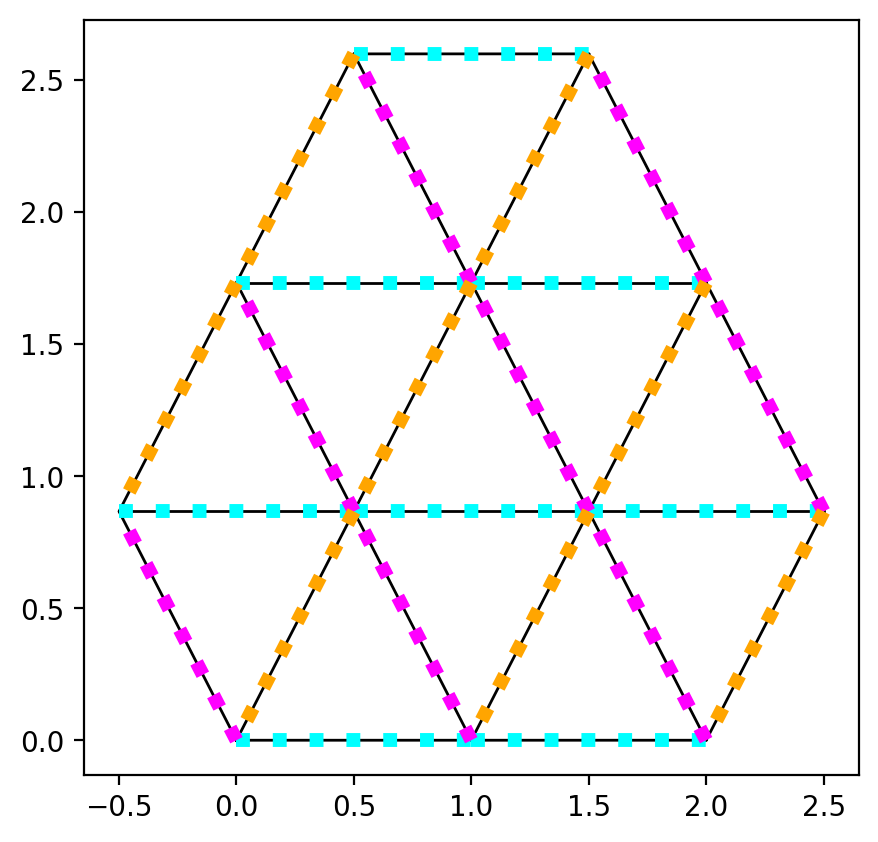

In [18]:
plt.figure(figsize=(5,5), dpi=200)
draw_12_cluster([0,0], color='black')
for xb in plaq12['inner']['x_bonds']:
    plt.plot([xs[xb[0]], xs[xb[1]]], 
             [ys[xb[0]], ys[xb[1]]],
             color='cyan', ls=':', linewidth=5)
for xb in plaq12['inner']['y_bonds']:
    plt.plot([xs[xb[0]], xs[xb[1]]], 
             [ys[xb[0]], ys[xb[1]]],
             color='magenta', ls=':', linewidth=5)
for xb in plaq12['inner']['z_bonds']:
    plt.plot([xs[xb[0]], xs[xb[1]]], 
             [ys[xb[0]], ys[xb[1]]],
             color='orange', ls=':', linewidth=5)